CONTEXTUALIZAÇÃO
Vocês atuam na NY Flights, uma companhia aérea de nível global, e foram questionados pela gestão sobre o desempenho das linhas aéreas. A empresa está extremamente preocupada com atraso em seus voos, alguns dados estatísticos sobre o tema foram solicitados para o time de ciência de dados da companhia (vocês).

O diretor do time solicitou algumas análises para a reunião, pois planos de ações serão definidos a partir destes dados da análise.

Vocês farão as análises em 3 etapas e em cada uma delas estarão respondendo as informações solicitadas pelos gestores da área.

ETAPA 1 

VOOS QUE ATRASAM MAIS DE 2 HORAS 

- Qual comportamento médio e a variância desses dados?

ETAPA 2

DESTINOS COM MAIOR NÚMERO DE ATRASOS

- Quais são os 5 piores?

- Considerar 5 minutos um atraso aceitável

ETAPA 3

VELOCIDADE MÉDIA DOS VOOS ATRASADOS

Qual a velocidade desses 5 destinos do item anterior 


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/nyflights.csv')
df

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [16]:
#df.isnull.sum()

AttributeError: ignored

In [8]:
df = df.drop('Unnamed: 0',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.923620,1632.471938,1.0,553.0,1496.0,3465.0,8500.0


ETAPA 1
Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas? 

-Filtrar a tabela com os registrados que atrasam mais de duas horas.

-Filtrar a coluna 'dep_delay'  e aplicar as funções describe() e .T 

Com o describe() algumas medidas de tendência central, mas não temos a variância.

-Adicionar uma coluna para a amplitude: df['range'] = df['max'] - df['min']

-Adicionar uma coluna para variância: dfT['var'] = pow(dfT_1['std'], 2)

In [12]:
#Filtrar a tabela com os registrados que atrasam mais de duas horas.
df_2h = df[df[('dep_delay')]>120]
df_2h

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
218,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00
268,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00
491,2013,1,1,1540.0,1338,122.0,2020.0,1825,115.0,B6,705,N570JB,JFK,SJU,193.0,1598,13,38,2013-01-01 13:00:00
649,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336579,2013,9,30,1823.0,1545,158.0,1934.0,1733,121.0,9E,3459,N916XJ,JFK,BNA,95.0,765,15,45,2013-09-30 15:00:00
336668,2013,9,30,1951.0,1649,182.0,2157.0,1903,174.0,EV,4294,N13988,EWR,SAV,95.0,708,16,49,2013-09-30 16:00:00
336724,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00
336757,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30 18:00:00


In [13]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [17]:
#Filtrar a coluna 'dep_delay' e aplicar as funções describe() e .T
df_desc = df_2h[['dep_delay']].describe().T
df_desc

,count,mean,std,min,25%,50%,75%,max
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0


In [23]:
#-Adicionar uma coluna para a amplitude: df['range'] = df['max'] - df['min']
df_desc['range'] = df_desc['max']- df_desc['min']
df_desc

,count,mean,std,min,25%,50%,75%,max,range
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0,1180.0


In [25]:
#Adicionar uma coluna para variância: dfT['var'] = pow(dfT_1['std'], 2)
df_desc['var'] = pow(df_desc['std'], 2)
df_desc

,count,mean,std,min,25%,50%,75%,max,range,var
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0,1180.0,5564.687952


ETAPA 2

Quais destinos geraram voos com o maior número de atrasos na partida?

(5 piores | Considerar 5 minutos um atraso aceitável)

-Filtrar a tabela com os registrados que atrasam mais de 5 minutos.

-Filtrar a coluna de destino, fazer uma contagem dos valores e apresentar os 5 últimos

-Filtrar a coluna de destino, fazer uma contagem dos valores e apresentar os 5 primeiros

In [26]:
#Quais destinos geraram voos com o maior número de atrasos na partida?
df_5M = df[df[('dep_delay')]>5]
df_5M


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,range
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00,NaN
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00,NaN
31,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,2013-01-01 06:00:00,NaN
41,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,2013-01-01 06:00:00,NaN
47,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,2013-01-01 06:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336759,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764,21,40,2013-09-30 21:00:00,NaN
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-09-30 20:00:00,NaN
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00,NaN
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-09-30 20:00:00,NaN


In [30]:
#5 Piores 
df_5M.sort_values(by='dep_delay', ascending=False).head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,range
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00,NaN
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15 19:00:00,NaN
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10 16:00:00,NaN
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20 18:00:00,NaN
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22 16:00:00,NaN


In [39]:
# Os 5 que tiveram os maiores atrasos
df_5M['dest'].value_counts().head(5)

ORD    4975
ATL    4687
LAX    4442
MCO    4083
SFO    4078
Name: dest, dtype: int64

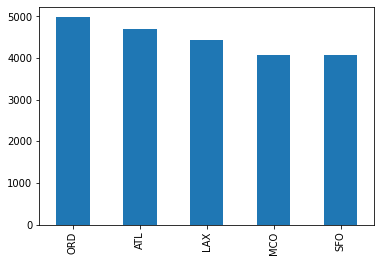

In [58]:
df_5M['dest'].value_counts().head(5).plot(kind = ('bar'))

In [40]:
# Os 5 que tiveram os menores atrasos
df_5M['dest'].value_counts().tail(5)

MTJ    6
SBN    6
EYW    6
PSP    3
ANC    3
Name: dest, dtype: int64

In [41]:
#5 com o maior atraso
#ultimos = df_5M.sort_values(by='dep_delay', ascending=False).head(5)
#ultimos['dest']

ETAPA 3
Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos.

-Filtrar a tabela com os registrados que mais atrasam

-Calcular a velocidade média

-Criar uma coluna com os valores dessas velocidades médias usando as colunas de  ['distance'] e ['air_time']

-Agrupar a tabela com os piores destinos

In [44]:
#Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos.
df_piores = df_5M[(df_5M['dest']=='ORD')|
                  (df_5M['dest']=='ATL')|
                  (df_5M['dest']=='LAX')| 
                  (df_5M['dest']=='MCO')| 
                  (df_5M['dest']=='SFO')]
df_piores

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,range
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00,NaN
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00,NaN
70,2013,1,1,709.0,700,9.0,852.0,832,20.0,UA,1092,N26226,LGA,ORD,135.0,733,7,0,2013-01-01 07:00:00,NaN
85,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01 06:00:00,NaN
91,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,33,N338AA,JFK,LAX,358.0,2475,7,30,2013-01-01 07:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336704,2013,9,30,2028.0,1910,78.0,2255.0,2215,40.0,AA,21,N338AA,JFK,LAX,294.0,2475,19,10,2013-09-30 19:00:00,NaN
336724,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00,NaN
336744,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30 21:00:00,NaN
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00,NaN


In [45]:
df_piores['dest'].value_counts()

ORD    4975
ATL    4687
LAX    4442
MCO    4083
SFO    4078
Name: dest, dtype: int64

In [47]:
#-Calcular a velocidade média
#Criar uma coluna com os valores dessas velocidades médias usando as colunas de ['distance'] e ['air_time']
df_piores['v_media'] = df_piores['distance']/ df_piores['air_time']
df_piores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,range,v_media
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,...,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00,NaN,5.172662
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,...,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00,NaN,7.065574
70,2013,1,1,709.0,700,9.0,852.0,832,20.0,UA,...,N26226,LGA,ORD,135.0,733,7,0,2013-01-01 07:00:00,NaN,5.429630
85,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,...,N37456,EWR,MCO,145.0,937,6,45,2013-01-01 06:00:00,NaN,6.462069
91,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,...,N338AA,JFK,LAX,358.0,2475,7,30,2013-01-01 07:00:00,NaN,6.913408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336704,2013,9,30,2028.0,1910,78.0,2255.0,2215,40.0,AA,...,N338AA,JFK,LAX,294.0,2475,19,10,2013-09-30 19:00:00,NaN,8.418367
336724,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,...,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00,NaN,8.197802
336744,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,...,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30 21:00:00,NaN,8.361486
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,...,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00,NaN,8.066038


In [50]:
#-Agrupar a tabela com os piores destinos
df_piores.groupby(['dest'])['v_media'].describe().reset_index() 

,dest,count,mean,std,min,25%,50%,75%,max
0,ATL,4653.0,6.773001,0.607525,4.418605,6.350000,6.803571,7.188679,11.723077
1,LAX,4423.0,7.595234,0.424649,6.150376,7.300885,7.592025,7.882166,9.000000
2,MCO,4078.0,7.059744,0.553557,4.418605,6.692857,7.098485,7.436508,8.596330
3,ORD,4929.0,6.335472,0.550842,3.857895,5.991667,6.373913,6.724771,8.264368
4,SFO,4044.0,7.493244,0.381926,6.107143,7.225352,7.495652,7.765766,8.694915


In [49]:
#-Agrupar a tabela com os piores destinos
df_piores.groupby(['dest'])['v_media'].agg('mean').reset_index() 

,dest,v_media
0,ATL,6.773001
1,LAX,7.595234
2,MCO,7.059744
3,ORD,6.335472
4,SFO,7.493244


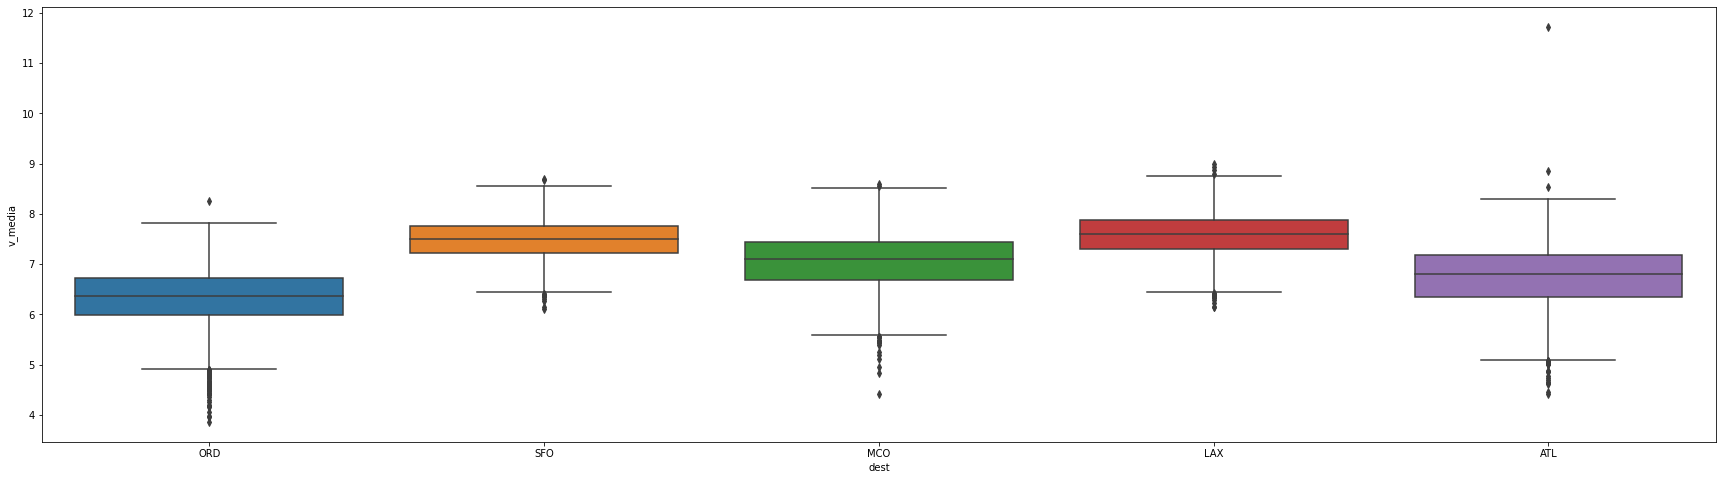

In [54]:
fig, axes =plt.subplots(figsize=(30,8))

sns.boxplot(data=df_piores, x='dest',y='v_media',ax= axes); 

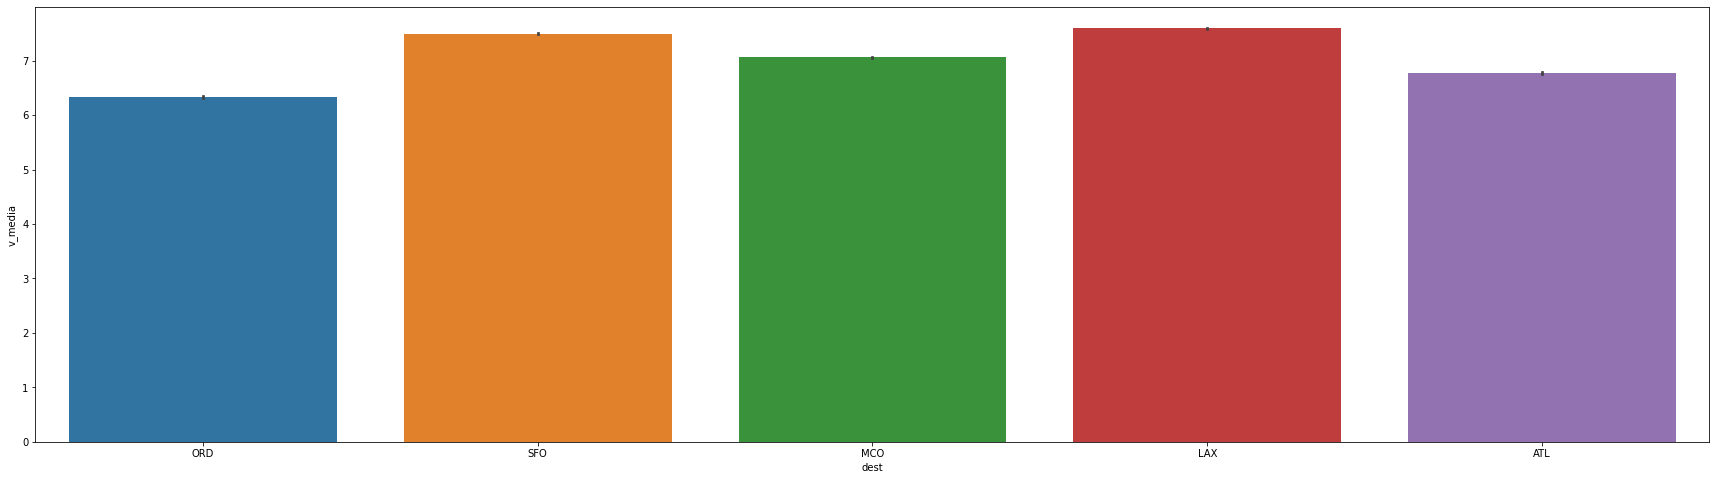

In [55]:
fig, axes =plt.subplots(figsize=(30,8))

sns.barplot(data=df_piores, x='dest',y='v_media',ax= axes); 